In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

from scipy.spatial import Delaunay

In [102]:
coords_nodes = 2 * np.random.rand(10, 2) - 1

def func(x, y):
    return np.sin(np.pi * x) + np.cos(np.pi * y)

values_nodes = func(coords_nodes[:, 0], coords_nodes[:, 0])

coords_nodes.shape, values_nodes.shape

((10, 2), (10,))

In [103]:
n_grid = 10

grid_points = np.linspace(-1, 1, n_grid)

x_grid, y_grid = np.meshgrid(grid_points, grid_points)

x_grid.shape, y_grid.shape

((10, 10), (10, 10))

In [104]:
mesh = Delaunay(coords_nodes)
mesh.simplices.shape, mesh.points.shape

((11, 3), (10, 2))

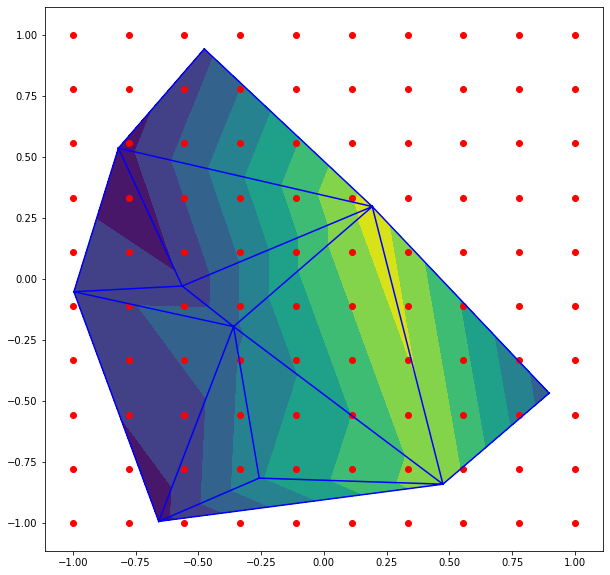

In [105]:
triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)

plt.figure(figsize=(10, 10))
plt.tricontourf(triangulation, values_nodes);
plt.triplot(triangulation, color='b');
plt.scatter(x_grid, y_grid, color='r')

In [129]:
grid_x = x_grid[0, :]
grid_y = y_grid[:, 0]

import itertools

grid = np.array(list(itertools.product(grid_x, grid_y)))

tri_grid = mesh.find_simplex(grid)
tri_grid

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  9,  9,  9,  1,  1,
        0, -1, -1, -1, 10,  9,  9,  7,  2,  2,  0,  0, -1, -1, 10, 10,  5,
        6,  2,  2,  0,  0, -1, -1,  5,  5,  4,  4,  6,  2,  0, -1, -1, -1,
        5,  4,  4,  4,  4,  0, -1, -1, -1, -1,  5,  4,  4,  3,  3, -1, -1,
       -1, -1, -1, -1,  3,  3,  3, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int32)

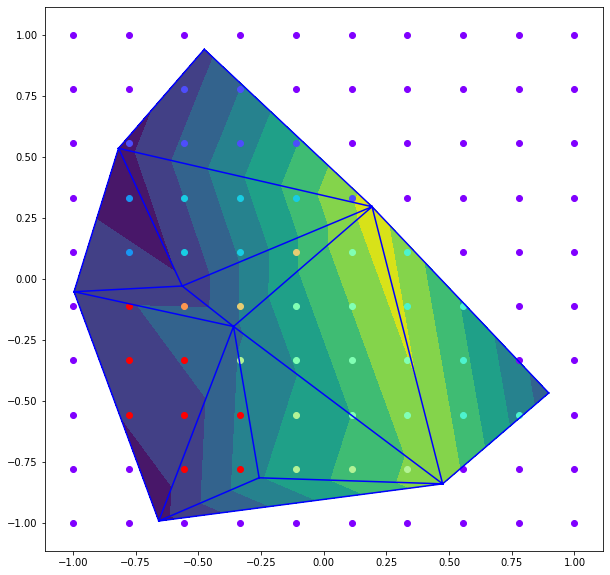

In [148]:
triangulation = matplotlib.tri.Triangulation(mesh.points[:, 0], mesh.points[:, 1], mesh.simplices)

colors = matplotlib.cm.rainbow((1 + tri_grid)/10)

plt.figure(figsize=(10, 10))
plt.tricontourf(triangulation, values_nodes);
plt.triplot(triangulation, color='b');
for i in range(len(colors)):
    plt.scatter(grid[i, 0], grid[i, 1], color=colors[i])